<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='40%'></img>

<br>


<a href="./21_sentinel3_nr_slstr_frp_exercise.ipynb"><< 21 - Sentinel-3 NRT SLSTR FRP - Exercise </a><span style="float:right;"><a href="./00_index.ipynb">Index >></a></span>

<div class="alert alert-block alert-success">
<b>EXERCISE WORKBOOK</b></div>

# Sentinel-3 Near Real Time SLSTR Aerosol Optical Depth (AOD)

This notebook is an `exercise workbook`, where you can practise the data handling with Sentinel-3 Near Real Time SLSTR Fire Radiative Power (FRP) data. The exercises base on the workflow introduced in the notebook [Sentinel-3 NRT SLSTR AOD - Californian Fires](./11_sentinel3_nrt_slstr_aod_Californian_fires.ipynb). We highly recommend that  you go through this notebook before you do this exercise workbook.

The exercise example is based on Sentinel-3 NRT SLSTR AOD data capturing the Australian fires sensed on 3 December 2019. As a comparison, you see below the Sentinel-3 OLCI Red Green Blue composites for the same day, which clearly shows the smoke plumes in Siberia resulting from the fires.


<br>


<div style='text-align:center;'>
<figure><img src='./img/s3_olci_1203.png' width='80%'/>
    <figcaption><i>RGB composites of Sentinel-OLCI Level 1 data on 3 December 2019</i></figcaption>
</figure>
</div>

<hr>

## How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code. Code exercises base on the notebook [Sentinel-3 SLSTR AOD - Californian fires](./12_sentinel3_slstr_aod_Californian_fires.ipynb).

You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

<hr>

## Outline
  
  
* [Example: Australian Fires - December 2019](#australian_fires)
  * [1 - Load Sentinel-3 SLSTR AOD data](#load)
  * [2 - Extract AOD variables](#extract)
  * [3 - Visualize AOD Ocean and AOD land information](#visualize)

<hr>

#### Load required libraries

In [1]:
import xarray as xr

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as pltfacebook
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#### Load helper functions

In [2]:
from ipynb.fs.full.functions import visualize_pcolormesh

<hr>

# <a id='australian_fires'></a>Example: Australian Fires - December 2019

This example shows how the Sentinel-3 SLSTR AOD product captured the Australian fires on 3 December 2019.

## <a id='load'></a>Load Sentinel-3 SLSTR AOD data

The Near-Real-Time Sentinel-3 Aerosol Optical Depth data are disseminated in `netCDF`. `netCDF` data can be loaded with the Python library [xarray](http://xarray.pydata.org/en/stable/) and its function `xr.open_dataset()`. 

You see that the data file contains two `dimensions`:
* `columns` and
* `rows`.

It further contains an long list of `data variables`, including:
* `AOD_550`,
* `AOD_550_uncertainty`,
* `AOD_550_Ocean_NonFiltered`,
* `AOD_550_Land_Experimental_PostFiltered`,
...

A data file also contains a set of `attributes`, which give you more information about the data file and the data it contains, e.g the `start_time` and `stop_time` or the `product_name`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Load the data file `AOD_Australia_20191203.nc` under the directory `./eodata/sentinel3/aod/` with the xarray function `xr.open_dataset()` and call the Dataset `file`. 
</div>

In [3]:
# Enter your solution below






In [4]:
file = xr.open_dataset('./eodata/AOD_Australia_20191203.nc')
file

<xarray.Dataset>
Dimensions:                                                (columns: 157, rows: 126)
Dimensions without coordinates: columns, rows
Data variables:
    AOD_550                                                (rows, columns) float32 ...
    AOD_550_uncertainty                                    (rows, columns) float32 ...
    AOD_670                                                (rows, columns) float32 ...
    AOD_865                                                (rows, columns) float32 ...
    AOD_1600                                               (rows, columns) float32 ...
    AOD_2250                                               (rows, columns) float32 ...
    FM_AOD550                                              (rows, columns) float32 ...
    AFRI                                                   (rows, columns) float32 ...
    Smoke_Index                                            (rows, columns) float32 ...
    ANG550_865                                       

<div class="alert alert-block alert-success">
<b>Question:</b><br>
   Can you identify the dimensions of the dataset and description? What data variables are available in the data file?
</div>

<br>

### <a id='extract'></a>Extract Aerosol Optical Depth variables

The next step is to extract the variables of interest. Let us select the following two variables:
* `AOD_550`: it is the Aerosol Optical Depth at 550nm. (*Note: it only covers ocean surfaces.*)
* `AOD_550_Land_Experimental_PostFiltered`: it is the Aerosol Optical Depth at 550nm. (*Note: it only covers land surfaces.*)

Both `DataArrays` have two dimensions (`rows` and `columns`) and the following attributes, which provide additional information about the variables:
* `long_name`
* `standard_name`
* `valid_min`
* `valid_max`
* `coordinates`

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Load the data variable `AOD_550` and `AOD_550_Land_Experimental_PostFiltered` from the xarray Dataset `file` above and call them `aod_ocean` and `aod_land` respectively.

<br>

Print both variables.
</div>

In [5]:
# Enter your solution here







In [6]:
aod_ocean = file.AOD_550
aod_land = file.AOD_550_Land_Experimental_PostFiltered
print(aod_ocean)
print(' ')
print(aod_land)

<xarray.DataArray 'AOD_550' (rows: 126, columns: 157)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Aerosol optical thickness at 550 nm - Best quality (post-...
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol
    valid_min:      0.0
    valid_max:      4.001
    coordinates:    latitude, longitude
 
<xarray.DataArray 'AOD_550_Land_Experimental_PostFiltered' (rows: 126, columns: 157)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan,

<div class="alert alert-block alert-success">
<b>Question:</b><br>

What is the `long_name` of both variables?
</div>

* `aod_ocean`: <br>
Aerosol optical thickness at 550 nm - Best quality (post-filtered due to e.g. cloud residuals, sedimentation...) - Only over ocean surfaces (Please read the EUMETSAT Product Notice for further details)
* `aod_land`: <br>
Aerosol optical thickness at 550 nm - Only over land surfaces  - Experimental version - Shall be only used with great caution following EUMETSAT recommendations in the Product Notice, not yet suitable for operational use of validation - Higher quality (Post-filtered of e.g. cloud residuals...)

<br>

You can also load `latitude` and `longitude` information, which can be used later for visualizing the variables.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Load the `latitude` and `longitude` variables from the xarray Dataset `file` above and call them `lat_nc` and `lon_nc` respectively.

<br>

Print both variables.
</div>

In [7]:
# Enter your solution here





In [8]:
lat_nc = file.latitude
lon_nc = file.longitude
print(lat_nc)
print(' ')
print(lon_nc)

<xarray.DataArray 'latitude' (rows: 126, columns: 157)>
array([[-21.088116, -21.1125  , -21.13686 , ..., -24.26877 , -24.284363,
        -24.301502],
       [-21.170284, -21.194693, -21.219078, ..., -24.351654, -24.368752,
        -24.385288],
       [-21.252445, -21.276878, -21.30129 , ..., -24.434649, -24.451668,
        -24.469072],
       ...,
       [-31.134344, -31.162287, -31.190866, ..., -34.55953 , -34.576115,
        -34.592617],
       [-31.215431, -31.243406, -31.27046 , ..., -34.647446, -34.664036,
        -34.67615 ],
       [-31.296503, -31.32451 , -31.355639, ..., -34.73023 , -34.743286,
        -34.759686]], dtype=float32)
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Latitude at pixel centre
    standard_name:  latitude
    units:          degrees_north
    valid_min:      -90.0
    valid_max:      90.0
 
<xarray.DataArray 'longitude' (rows: 126, columns: 157)>
array([[149.56761, 149.65527, 149.74295, ..., 163.3912 , 163.48425, 163.5768

### <a id='visualize'></a> Visualize AOD Ocean and AOD Land variables

The final step is to visualize both variables, Aerosol Optical Depth over ocean and land together in one plot. You can use the function [visualize_pcolormesh()](./functions.ipynb#visualize_pcolormesh) for it.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Visualize both variables, `aod_ocean` and `aod_land` with the function [visualize_pcolormesh()].

<br>

HINT: with `?visualize_pcolormesh` you can open then function's docstring and see what keyword arguments the function takes.
</div>

In [9]:
?visualize_pcolormesh

In [10]:
# Enter your solution here







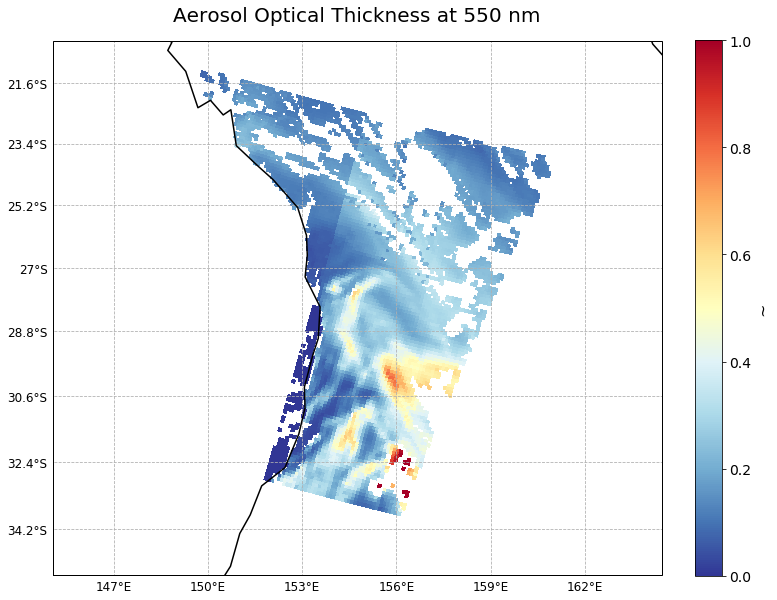

In [11]:
visualize_pcolormesh(aod_ocean, 
                     aod_land, 
                     lat_nc, lon_nc, 
                     'Aerosol Optical Thickness at 550 nm', 
                     '~', 
                     0.,
                     1.0,
                     cm.RdYlBu_r,
                     ccrs.Mercator())

<br>

<br>


<a href="./21_sentinel3_nr_slstr_frp_exercise.ipynb"><< 21 - Sentinel-3 NRT SLSTR FRP - Exercise </a><span style="float:right;"><a href="./00_index.ipynb">Index >></a></span>

<hr>

<img src='./img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.